In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [10]:
# start date used to make output.csv
start_date_string = "2018-03-01 00:00:00"
start_date = datetime.strptime(start_date_string, "%Y-%m-%d %H:%M:%S")

timeStep = 4 #hours

numberOfRuns = 552 # Number of times the timestep was computed

timesInRange = [start_date+timedelta(hours=(timeStep*numberOfRuns)) for i in range(numberOfRuns)]

print(timesInRange)

[datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), 

In [11]:
outputDf = (pd.read_csv("output.csv"))
inputDf = (pd.read_csv("data/20210204.matilija.dhsvm.discharge.flux.csv"))
           
header_list = ["col","row","segment","length.m", "bank.height.m","channel.width.m"]
mapDf = (pd.read_csv("data/stream.map.csv", "\t", names=header_list))
           



In [12]:
mapDf.head()

,col,row,segment,length.m,bank.height.m,channel.width.m
0,382,124,139,38.74103,0.01551,0.3
1,383,125,139,38.74103,0.01551,0.3
2,384,126,139,27.39491,0.01579,0.3
3,385,126,139,38.74103,0.01521,0.3
4,386,127,139,27.39491,0.01511,0.3


In [13]:
outputDf.head()

,segmentId,time,dimensionlessDischarge,overThreshold,Unnamed: 4
0,1,0.25,0.000000,0,NaN
1,2,0.25,1.000025,1,NaN
2,3,0.25,0.000000,0,NaN
3,4,0.25,4.354977,1,NaN
4,5,0.25,7.054143,1,NaN


In [14]:
inputDf.head()

,segment,class,datetime,timestep.s,outflow.m3pts,hyd.width.m,hyd.depth.m,outflow.flux.mpts,outflow.flux.mps
0,1,14,2017-12-01T00:00:00Z,3600,0.0,0.3,1.0,0.0,0.0
1,1,14,2017-12-01T01:00:00Z,3600,0.0,0.3,1.0,0.0,0.0
2,1,14,2017-12-01T02:00:00Z,3600,0.0,0.3,1.0,0.0,0.0
3,1,14,2017-12-01T03:00:00Z,3600,0.0,0.3,1.0,0.0,0.0
4,1,14,2017-12-01T04:00:00Z,3600,0.0,0.3,1.0,0.0,0.0


In [15]:
segments = outputDf['segmentId'].unique()

dimensionlessDischargeSum = {}
outFlowSum = {}
maxSumDD = 0
maxSumFlow = 0
for segment in segments:
    dimensionlessDischargeSum[segment] = sum(outputDf.loc[outputDf['segmentId'] == segment]['dimensionlessDischarge'])
    outFlowSum[segment] = sum(inputDf.loc[inputDf['segment'] == segment]['outflow.m3pts'])
    if dimensionlessDischargeSum[segment] > maxSumDD:
        maxSumDD = dimensionlessDischargeSum[segment]
    if outFlowSum[segment] > maxSumFlow:
        maxSumFlow = outFlowSum[segment]
for segment in segments:
    dimensionlessDischargeSum[segment] = dimensionlessDischargeSum[segment]/maxSumDD
    outFlowSum[segment] = outFlowSum[segment]/maxSumFlow

In [32]:
print(dimensionlessDischargeSum)

{1: 0.0, 2: 0.0005116049878919317, 3: 0.0, 4: 0.007123503916593641, 5: 0.0019854758925719296, 6: 0.012144813218443023, 7: 0.0003045858526777214, 8: 0.0, 9: 0.008306274520999267, 10: 8.314980482709279e-05, 11: 0.0, 12: 0.00032980636869745324, 13: 0.0034105605845997497, 14: 1.3728035035460921e-05, 15: 0.03084435628155946, 16: 0.0007806047133989613, 17: 0.005663014171547803, 18: 0.010637671764883764, 19: 0.020340570500885103, 20: 0.0, 21: 0.0020528208533085483, 22: 0.00011083463469152414, 23: 0.0, 24: 0.025346026026752972, 25: 0.008712895590198397, 26: 0.05275132164410209, 27: 0.059799838453603545, 28: 0.008991163948938946, 29: 0.0, 30: 0.03605197995730492, 31: 0.00042433366453513676, 32: 0.006672922034065035, 33: 0.0018597597461253478, 34: 0.0013966977614101185, 35: 0.005501969423344054, 36: 0.009817538284282891, 37: 0.0012175323197780104, 38: 0.021963168037273825, 39: 0.009784558339456415, 40: 0.0026381699701964975, 41: 0.019331539820893487, 42: 0.0074081322926538755, 43: 0.030075951367

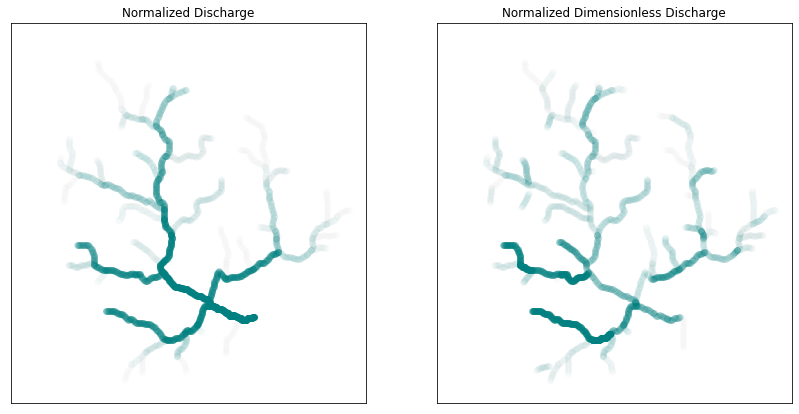

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2)


for segment in segments: 
    cols =  list(mapDf.loc[mapDf['segment'] == segment]['col'])
    rows =  list(mapDf.loc[mapDf['segment'] == segment]['row'])
    
    ax2.scatter(cols,rows, color = 'teal', alpha=dimensionlessDischargeSum[segment])
    ax2.set_title('Normalized Dimensionless Discharge')
    ax1.scatter(cols,rows, color = 'teal', alpha=outFlowSum[segment])
    ax1.set_title('Normalized Discharge')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])

f.set_figheight(7)
f.set_figwidth(14)

plt.show()
        


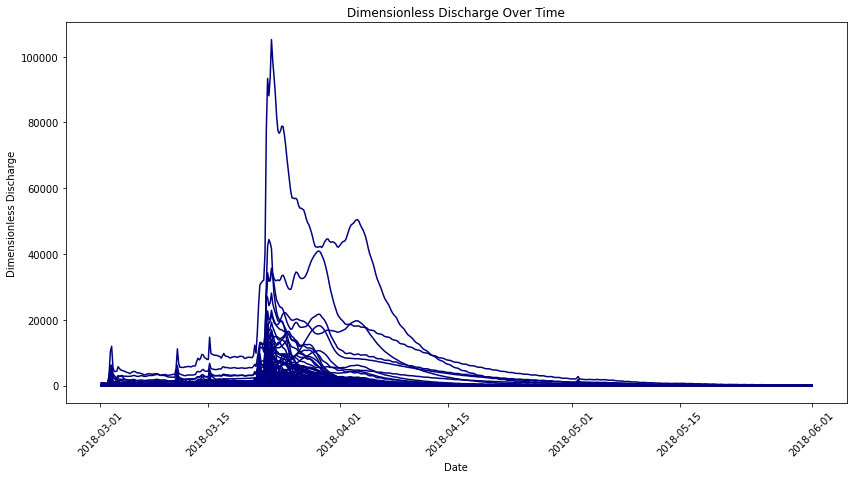

In [17]:
f, ax = plt.subplots(1, 1)

segments = outputDf['segmentId'].unique()
for segment in segments:
    dimensionlessDischargeValues = list(outputDf.loc[outputDf['segmentId'] == segment]['dimensionlessDischarge'])
    dimensionlessDischargeTimeStep = [start_date+timedelta(hours=((time/.25)*4))for time in list(outputDf.loc[outputDf['segmentId'] == segment]['time'])]
    ax.plot(dimensionlessDischargeTimeStep, dimensionlessDischargeValues, color="navy")
    plt.xticks(rotation=45)
ax.set_title('Dimensionless Discharge Over Time')
ax.set_ylabel('Dimensionless Discharge')
ax.set_xlabel('Date')
f.set_figheight(7)
f.set_figwidth(14)
plt.show()

In [42]:
# threshold graph (current values not based on real data)

# make list of 1 or 0 if threshold was reached in at any point
thresholdValues = {}

for segment in segments:
    #print(list(outputDf.loc[outputDf['segmentId'] == segment]['overThreshold']))
    if 1.0 in list(outputDf.loc[outputDf['segmentId'] == segment]['overThreshold']):
        thresholdValues[segment] = .5
    else:
        thresholdValues[segment] = .03


In [43]:
print(thresholdValues)

{1: 0.03, 2: 0.5, 3: 0.03, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.5, 8: 0.03, 9: 0.5, 10: 0.5, 11: 0.03, 12: 0.5, 13: 0.5, 14: 0.5, 15: 0.5, 16: 0.5, 17: 0.5, 18: 0.5, 19: 0.5, 20: 0.03, 21: 0.5, 22: 0.5, 23: 0.03, 24: 0.5, 25: 0.5, 26: 0.5, 27: 0.5, 28: 0.5, 29: 0.03, 30: 0.5, 31: 0.5, 32: 0.5, 33: 0.5, 34: 0.5, 35: 0.5, 36: 0.5, 37: 0.5, 38: 0.5, 39: 0.5, 40: 0.5, 41: 0.5, 42: 0.5, 43: 0.5, 44: 0.5, 45: 0.5, 46: 0.5, 47: 0.5, 48: 0.5, 49: 0.5, 50: 0.5, 51: 0.5, 52: 0.5, 53: 0.5, 54: 0.5, 55: 0.5, 56: 0.5, 57: 0.5, 58: 0.5, 59: 0.5, 60: 0.03, 61: 0.03, 62: 0.5, 63: 0.03, 64: 0.5, 65: 0.5, 66: 0.03, 67: 0.5, 68: 0.03, 69: 0.5, 70: 0.03, 71: 0.5, 72: 0.03, 73: 0.5, 74: 0.5, 75: 0.5, 76: 0.5, 77: 0.5, 78: 0.5, 79: 0.5, 80: 0.03, 81: 0.03, 82: 0.5, 83: 0.03, 84: 0.5, 85: 0.5, 86: 0.5, 87: 0.5, 88: 0.5, 89: 0.5, 90: 0.5, 91: 0.5, 92: 0.5, 93: 0.5, 94: 0.5, 95: 0.5, 96: 0.5, 97: 0.5, 98: 0.5, 99: 0.5, 100: 0.5, 101: 0.5, 102: 0.5, 103: 0.5, 104: 0.5, 105: 0.5, 106: 0.5, 107: 0.5, 108: 0.5, 109: 0.5, 

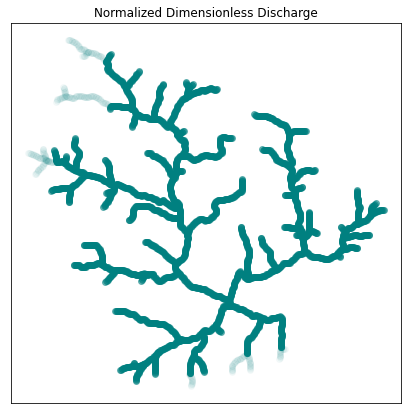

In [44]:
f, ax3 = plt.subplots(1, 1)


for segment in segments: 
    cols =  list(mapDf.loc[mapDf['segment'] == segment]['col'])
    rows =  list(mapDf.loc[mapDf['segment'] == segment]['row'])
    ax3.scatter(cols,rows, color = 'teal', alpha=thresholdValues[segment])
    ax3.set_title('Normalized Dimensionless Discharge')
    ax3.set_xticks([])
    ax3.set_yticks([])


f.set_figheight(7)
f.set_figwidth(7)

plt.show()